In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
import sklearn.metrics as metrics
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf

# DADOS

In [2]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
yt = to_categorical(yt,2)

# scalerx = MinMaxScaler().fit(xt)
# xScaled = scalerx.transform(xt)
# scalerx = StandardScaler().fit(xt)
# xScaled = scalerx.transform(xt)
xScaled =  (xt).astype('float32')/255.0
# oi = (xt).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()
# oi = (xScaled).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.1, shuffle=True, random_state=10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, shuffle=True, random_state=10)
counterx=0
countery=0
increment = 4
add = []
for idx, i in enumerate(y_train):
        if i[1] == 1:
            counterx += increment
            for k in range(0, increment-1):
                y_train = np.vstack((y_train, i))
                add = np.append(add, X_train[idx, :])
        else: 
             countery += 1
X_train = np.append(X_train, add)
print(counterx/(counterx+countery), countery/(counterx+countery), counterx, countery)

0.386002886002886 0.613997113997114 2140 3404


# Apenas para ver as imagens

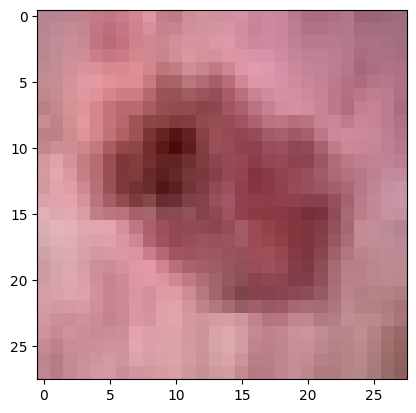

[[0. 1.]]


In [4]:
oi = X_train.reshape(-1,28,28,3)
for i in oi[-1:]:
    plt.imshow(i)
    plt.show()
print(y_train[-1:])

# Código da Neural Network

In [5]:
MLP = Sequential()
MLP.add(Convolution2D(32, (3,3), input_shape=(28,28,3), activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2,2), strides=2))
MLP.add(Convolution2D(64, (5,5), activation='relu',padding='same'))
MLP.add(MaxPooling2D(pool_size=(2,2), strides=2))
MLP.add(Flatten())
MLP.add(Dense(16, activation='relu'))
MLP.add(Dense(32, activation='relu'))
MLP.add(Dense(2, activation='softmax'))
X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
X_validationrs = X_validation.reshape(-1, 28,28,3)

In [6]:
# MLP = Sequential()
# MLP.add(Dense(64,input_dim=28*28*3, activation='relu'))
# MLP.add(Dense(128, activation='relu'))
# MLP.add(Dense(2, activation='softmax'))
# X_trainrs = X_train.reshape(-1, 28*28*3)
# X_validationrs = X_validation
# X_testrs = X_test

In [7]:
MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 16)                5

In [8]:
# learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.0001,
#     decay_steps=10000,
#     decay_rate=0.96
# )
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=4,
    min_lr=0.0001
)
MLP.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

In [9]:
Early_callback = EarlyStopping(monitor='val_loss', patience=9, mode='min', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = MLP.fit(x=X_trainrs, y=y_train, epochs=50, validation_data=(X_validationrs, y_validation), verbose=2, batch_size=200, callbacks=[lr_callback, Early_callback])

Epoch 1/50
28/28 - 7s - loss: 0.6041 - accuracy: 0.6299 - mse: 0.2111 - val_loss: 0.4695 - val_accuracy: 0.6252 - val_mse: 0.1621 - lr: 0.0010 - 7s/epoch - 240ms/step
Epoch 2/50
28/28 - 5s - loss: 0.5395 - accuracy: 0.6822 - mse: 0.1872 - val_loss: 0.4132 - val_accuracy: 0.7188 - val_mse: 0.1430 - lr: 0.0010 - 5s/epoch - 186ms/step
Epoch 3/50
28/28 - 5s - loss: 0.4984 - accuracy: 0.7266 - mse: 0.1712 - val_loss: 0.4160 - val_accuracy: 0.7395 - val_mse: 0.1466 - lr: 0.0010 - 5s/epoch - 179ms/step
Epoch 4/50
28/28 - 5s - loss: 0.4744 - accuracy: 0.7410 - mse: 0.1623 - val_loss: 0.4046 - val_accuracy: 0.7780 - val_mse: 0.1355 - lr: 0.0010 - 5s/epoch - 166ms/step
Epoch 5/50
28/28 - 5s - loss: 0.4625 - accuracy: 0.7560 - mse: 0.1570 - val_loss: 0.3566 - val_accuracy: 0.8058 - val_mse: 0.1205 - lr: 0.0010 - 5s/epoch - 171ms/step
Epoch 6/50
28/28 - 5s - loss: 0.4568 - accuracy: 0.7565 - mse: 0.1555 - val_loss: 0.5879 - val_accuracy: 0.6306 - val_mse: 0.2111 - lr: 0.0010 - 5s/epoch - 175ms/ste

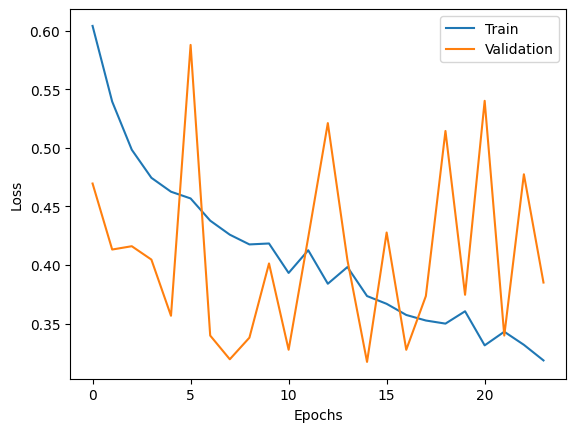

In [10]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

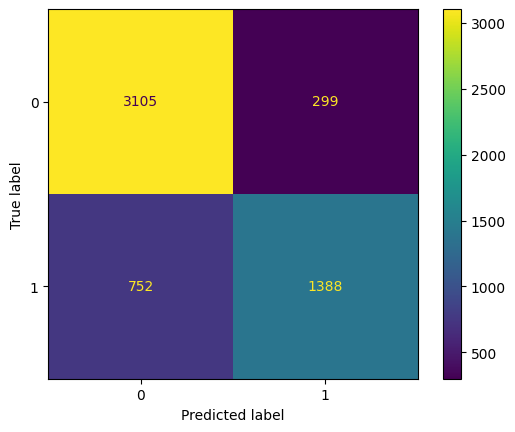

F1 -> 0.7253723543245363


In [11]:
from sklearn.metrics import f1_score
y_predtrain = MLP.predict(X_trainrs, verbose=0)
y_predtrain = np.argmax(y_predtrain, axis=1)
cm2 = confusion_matrix(np.argmax(y_train, axis=1), y_predtrain)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0,1])
disp2.plot()
plt.show()
print("F1 ->", f1_score(np.argmax(y_train, axis=1), y_predtrain))

In [12]:

y_pred = MLP.predict(X_testrs, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
MLP.evaluate(X_testrs, y_test, verbose=1)
y_comp = np.argmax(y_test, axis=1)
print("F1 ->", f1_score(y_comp, y_pred))
print("Balanced ACC ->", balanced_accuracy_score(y_comp, y_pred))

20/20 [==============================] - 0s 8ms/step - loss: 0.3269 - accuracy: 0.8259 - mse: 0.1110
F1 -> 0.5725490196078432
Balanced ACC -> 0.7665343915343915


In [13]:
counter = 0
for i in range(len(y_comp)):
    if(y_pred[i] != y_comp[i]):
        #print(i, "\t", y_pred[i], "\t", y_test[i])
        counter+=1
counter

109

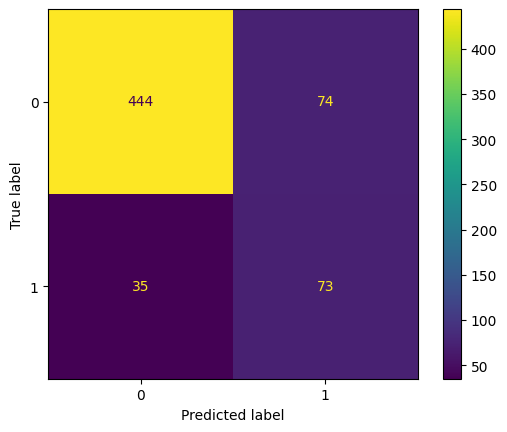

In [17]:
cm = confusion_matrix(y_comp, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()
